# Geopandas


Come utilizzare geopandas e come importarlo?

In [ ]:
!pip install geopandas # Installiamo geopandas, perchè non è un pacchetto già installato da colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas # Importiamo la libreria

# Esercitazione 1



Esercizio 1

In [ ]:
stations = geopandas.read_file('https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/paris_bike_stations_mercator.gpkg?raw=true') # Leggere i file

In [ ]:
type(stations)  # Controllare il tipo di variabile --> GeoDataFrame

geopandas.geodataframe.GeoDataFrame

In [ ]:
stations.head() # Trovare le prime righe del dataFrame

,name,bike_stands,available_bikes,geometry
0,14002 - RASPAIL QUINET,44,4,POINT (259324.887 6247620.771)
1,20503 - COURS DE VINCENNES PYRÉNÉES,21,3,POINT (267824.377 6249062.894)
2,20011 - PYRÉNÉES-DAGORNO,21,0,POINT (267742.135 6250378.469)
3,31008 - VINCENNES (MONTREUIL),56,0,POINT (271326.638 6250750.824)
4,43006 - MINIMES (VINCENNES),28,27,POINT (270594.689 6248007.705)


In [ ]:
stations.shape # Attributo per trovare il numero di features

(1226, 4)

Esecizio 2


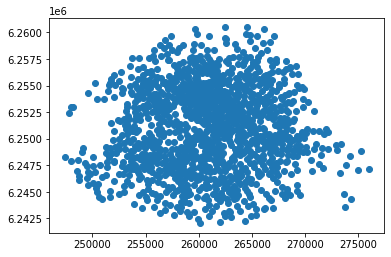

In [ ]:
stations.plot() # Crea un plot basandosi sul dataset Stations

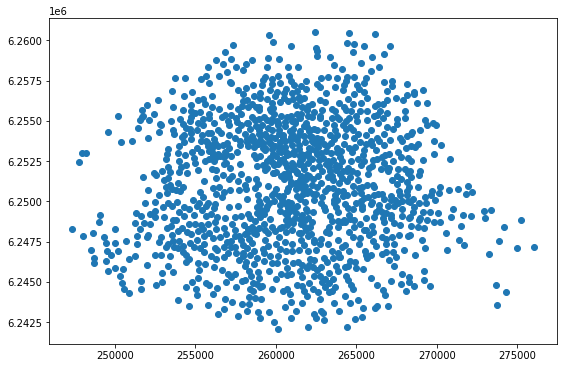

In [ ]:
stations.plot(figsize=(12,6)) # Crea un plot, però utilizzando la keyword figsize puoi scegliere quanto è grande.

Esercizio 3


In [ ]:
!pip install contextily # Installare la libreria contextily

In [ ]:
import contextily # Importare la libreria

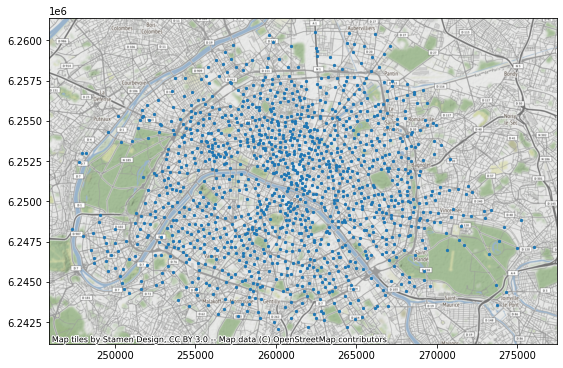

In [ ]:
ax = stations.plot(figsize=(12,6), markersize=5) # Creare la figura utilizzando Markersize per diminuire o aumentare la grandezza dei punti
contextily.add_basemap(ax) # add_basemap serve per aggiungere la mappa come background

Esercizio 4


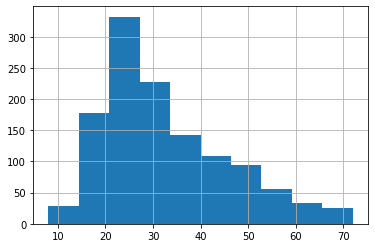

In [ ]:
stations['bike_stands'].hist() # Serve per mostrare in un istogramma i valori

Esercizio 5

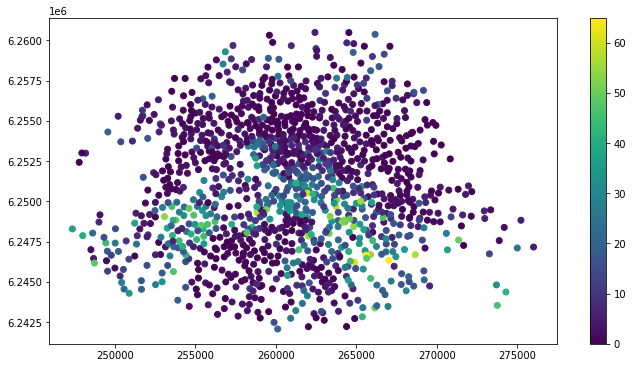

In [ ]:
stations.plot(figsize=(12, 6), column='available_bikes', legend=True) # Creare una figura utilizzando column per determinare i colori e legend per mostrare la legenda a destra

Esercizio 6

In [ ]:
districts = geopandas.read_file("https://github.com/jorisvandenbossche/geopandas-tutorial/blob/main/data/paris_districts_utm.geojson?raw=true") # Leggere il file
districts.head() # Mostrare la tabella delle prime righe

,id,district_name,population,geometry
0,1,St-Germain-l'Auxerrois,1672,"POLYGON ((451922.133 5411438.484, 451922.080 5..."
1,2,Halles,8984,"POLYGON ((452278.419 5412160.893, 452192.407 5..."
2,3,Palais-Royal,3195,"POLYGON ((451553.806 5412340.522, 451528.058 5..."
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5..."
4,5,Gaillon,1345,"POLYGON ((451328.752 5412991.278, 451294.721 5..."


In [ ]:
districts.shape

(80, 4)

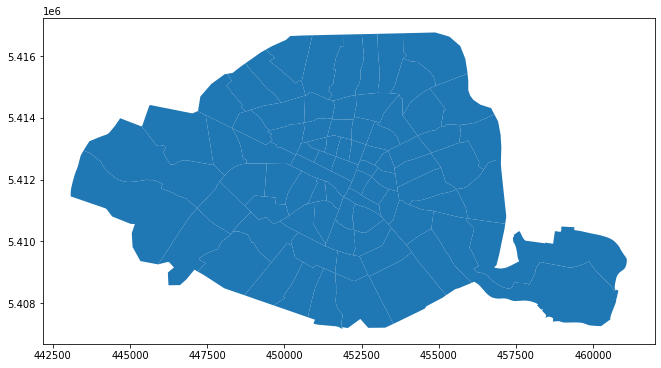

In [ ]:
districts.plot(figsize=(12, 6))

Esericizio 7

In [ ]:
districts.geometry.area

0     8.685379e+05
1     4.122371e+05
2     2.735494e+05
3     2.693111e+05
4     1.879097e+05
          ...     
75    1.294254e+06
76    8.061191e+05
77    1.486139e+06
78    1.598127e+06
79    2.089783e+06
Length: 80, dtype: float64

In [ ]:
districts['area'] = districts.geometry.area

In [ ]:
districts.sort_values(by='area', ascending=False)

,id,district_name,population,geometry,area
45,46,Picpus,62947,"POLYGON ((456790.759 5408686.978, 456841.941 5...",7.201383e+06
60,61,Auteuil,67967,"POLYGON ((444930.499 5411923.067, 444957.444 5...",6.380679e+06
44,45,Bel-Air,33976,"POLYGON ((456987.121 5409120.599, 456996.502 5...",5.967841e+06
61,62,Muette,45214,"POLYGON ((444686.860 5413985.234, 445358.893 5...",5.475037e+06
62,63,Porte-Dauphine,27423,"POLYGON ((446548.869 5414236.010, 447025.036 5...",3.085061e+06
...,...,...,...,...,...
9,10,Enfants-Rouges,8562,"POLYGON ((453580.220 5412266.849, 453591.609 5...",2.716030e+05
3,4,Place-Vendôme,3044,"POLYGON ((451004.908 5412654.095, 450960.640 5...",2.693111e+05
5,6,Vivienne,2917,"POLYGON ((451686.936 5412747.032, 451682.879 5...",2.434179e+05
11,12,Sainte-Avoie,7501,"POLYGON ((452928.277 5412227.550, 452830.786 5...",2.132014e+05


Esercizio 8

In [ ]:
districts['population_density'] = districts.population / districts.geometry.area * (10**6)

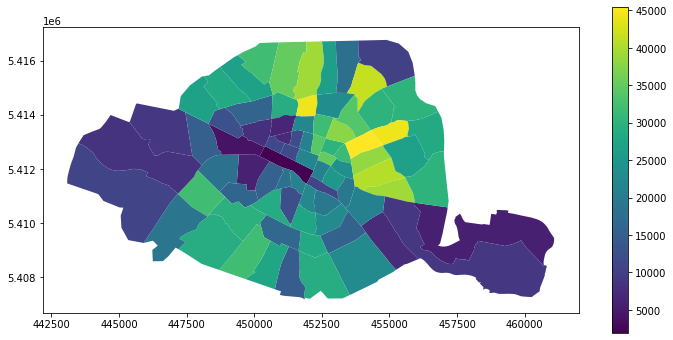

In [ ]:
districts.plot(column='population_density',figsize=(12,6),legend=True)